In [1]:
import pandas as pd
#import cProfile

# Transantiago's travels public submit
url = 'https://github.com/diegocaro/tallerds/raw/master/notebooks/origen_destino_stgo_2012/EOD_STGO/viajes.csv'
viajes = pd.read_csv(url, sep=';', decimal=',', index_col=['Viaje'])

In [2]:
# Let's work with a sample to save computing time
data_cols = ['OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY']
drop_cols = [x for x in list(viajes.columns) if x not in data_cols]
viajes_sample = viajes.drop(columns=drop_cols).replace(0, None).dropna().drop_duplicates().sample(n=8000)

# Check size
viajes_sample.shape

(8000, 4)

In [3]:
# Remove travels from/to outside the city, so the plot don't have to scale way outside the city

limit_n = 6316000
limit_s = 6278000
limit_w =  332000
limit_e =  368000

query = '@limit_s < OrigenCoordY < @limit_n'
query += ' and @limit_s < DestinoCoordY < @limit_n'
query += ' and @limit_w < OrigenCoordX < @limit_e'
query += ' and @limit_w < DestinoCoordX < @limit_e'

viajes_city = viajes_sample.query(query)

# Check size
viajes_city.shape

(7035, 4)

In [4]:
viajes_city

OrigenCoordX  OrigenCoordY  DestinoCoordX  DestinoCoordY
Viaje                                                               
1426010102   350503.8125     6288261.5    348334.4688      6288448.5
2151710203   335132.4063     6299057.5    341645.0938      6296780.0
2261610102   350360.8438     6300691.0    352702.5000      6281912.5
2208900202   357607.6250     6305049.5    355698.9063      6285614.5
1391210101   352191.6250     6288903.0    351118.0000      6290176.0
...                  ...           ...            ...            ...
2416610202   343811.5000     6306721.0    337398.5000      6307239.0
1485510202   349628.1875     6285747.5    349600.6563      6285562.0
1910110202   349914.3438     6296356.5    349728.0625      6295887.0
2713630204   346590.2500     6298257.0    347888.8750      6298812.5
2155110204   337576.0000     6298080.0    336749.9063      6297916.5

[7035 rows x 4 columns]

In [21]:
import numpy as np
S_initial = np.median(np.sqrt((viajes_city.values[:,0] - viajes_city.values[:,2])**2 + (viajes_city.values[:,1] - viajes_city.values[:,3])**2))/100
S_initial

41.731287747682366

In [5]:
import forcebundle.ForcedirectedEdgeBundling as feb

edges, valid = feb.array2edges(viajes_city.values)
# Check size (small edges are removed)
len(edges)

6920

In [25]:
# Overwrite default hyper-parameters:
#
# higher initial distance to move points
feb.S_initial = 50
# lowe compatibility threshold
feb.compatibility_threshold = 0.5

output_lines = feb.forcebundle(edges)

6920


  0%|          | 0/6919 [00:00<?, ?Edges/s]

  0%|          | 0/6 [00:00<?, ?cycle/s]

In [23]:
feb.S_initial

50

/home/tabitacatalan/miniconda3/envs/force_bundle/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/mnt/c/Users/Tabita/Documents/practica3/python.ForceBundle/src/forcebundle/usageHelper.py:49: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
/home/tabitacatalan/miniconda3/envs/force_bundle/lib/python3.8/site-packages/contextily/tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(


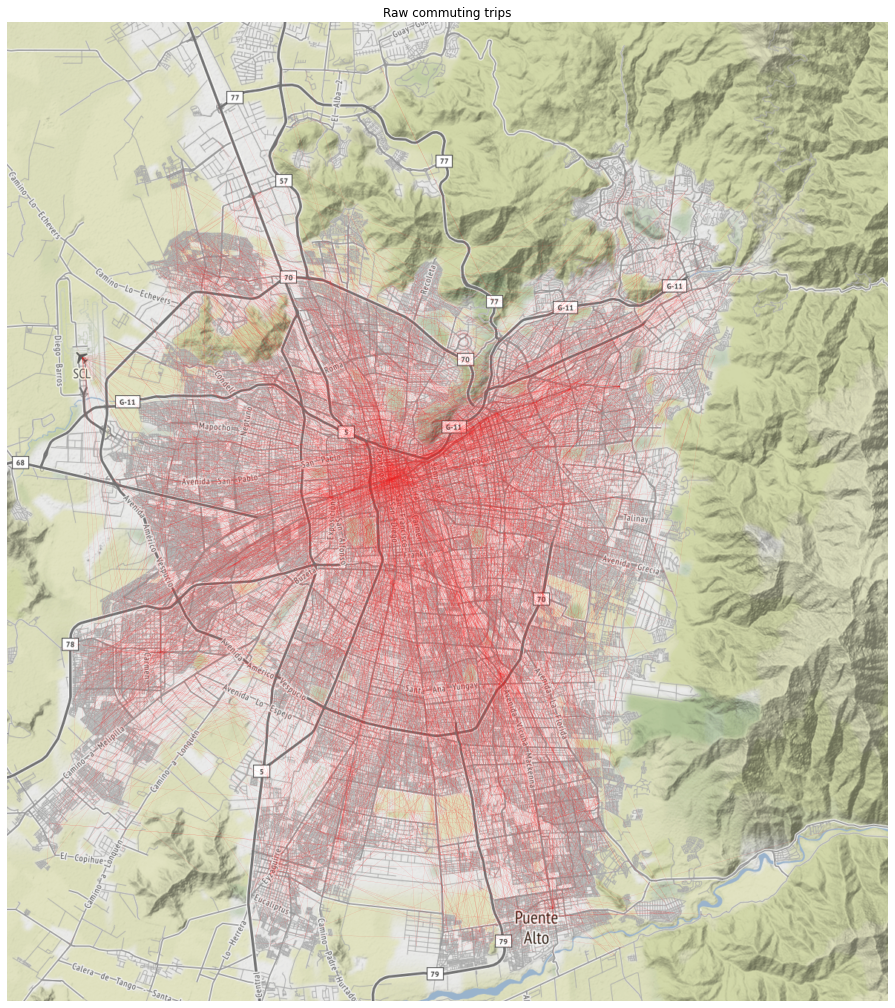

/home/tabitacatalan/miniconda3/envs/force_bundle/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/mnt/c/Users/Tabita/Documents/practica3/python.ForceBundle/src/forcebundle/usageHelper.py:49: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
/home/tabitacatalan/miniconda3/envs/force_bundle/lib/python3.8/site-packages/contextily/tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(


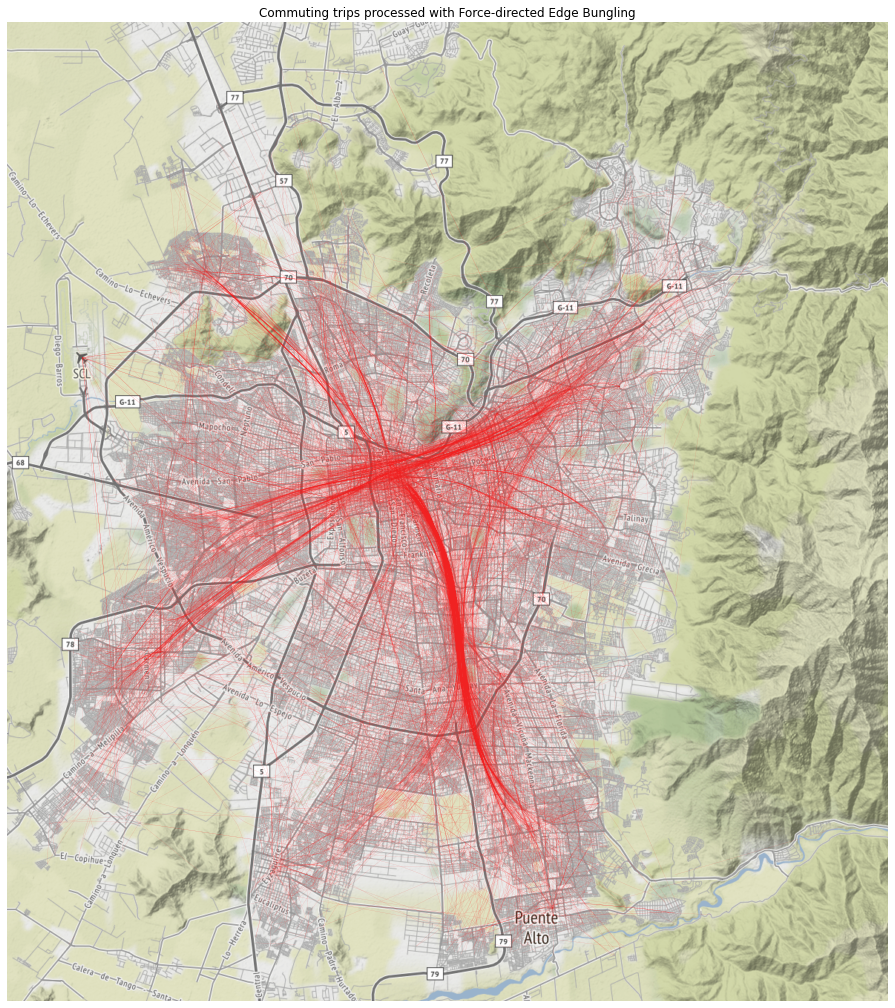

In [24]:
import forcebundle.usageHelper as uh
%matplotlib inline

# Plot raw for comparison
input_lines = feb.edges2lines(edges)
uh.plot_lines_on_map(input_lines, footer='Raw commuting trips')

# Plot trips after Force-directed Edge Bungling
uh.plot_lines_on_map(output_lines, footer='Commuting trips processed with Force-directed Edge Bungling')